In [ ]:
import nbimporter 
import Stress_Echantillon
def run_notebook():
    %run Stress_Echantillon.ipynb

run_notebook()


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
Grades.head()

,MIDTERM1,MIDTERM2,FINAL
S1,78,82,182
S2,82,85,180
S3,77,90,188
S4,75,77,149
S5,67,77,157


In [5]:
Grades = Grades.drop(index='S10')
Grades.head(10)

,MIDTERM1,MIDTERM2,FINAL
S1,78,82,182
S2,82,85,180
S3,77,90,188
S4,75,77,149
S5,67,77,157
S6,71,64,175
S7,64,33,110
S8,92,88,184
S9,80,39,126


In [6]:
#student list 
df_student=[]
for i in range(1 ,10) :
    student = 'S' + str(i) 
    df_student.append(student)

print(df_student)

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']


In [7]:
#Read Dataframes 
for i in range(9) :
    path = df_student[i] + 'Data.csv'
    df_student[i] = pd.read_csv(path)

In [8]:
for i in range(9) :
    df_student[i].rename(columns={" IBI" : "IBI"}  , inplace = True)
print(df_student[0]['IBI'].head())

0    0.484397
1    0.484397
2    0.390643
3    0.515649
4    0.468771
Name: IBI, dtype: float64


In [9]:
colonnes = df_student[0].columns
print(colonnes)

Index(['EDA', 'TEMP', 'HR', 'IBI', 'EDA.1', 'TEMP.1', 'HR.1', ' IBI.1',
       'EDA.2', 'TEMP.2', 'HR.2', ' IBI.2'],
      dtype='object')


In [10]:
col = ['EDA_FINAL' , 'TEMP_FINAL' , 'HR_FINAL' , 'IBI_FINAL' ,
       'EDA_EXAM1' , 'TEMP_EXAM1' , 'HR_EXAM1' , 'IBI_EXAM1' , 
       'EDA_EXAM2' , 'TEMP_EXAM2' , 'HR_EXAM2' , 'IBI_EXAM2']

In [11]:
#Renomer les colonnes pour l'analyse 
for i in range(9) :
        df_student[i].columns = col      
print(df_student[0].head())

   EDA_FINAL  TEMP_FINAL  HR_FINAL  IBI_FINAL  EDA_EXAM1  TEMP_EXAM1  \
0   0.001281       22.41     109.0   0.484397   0.001281       22.11   
1   0.020500       22.41      90.0   0.484397   0.019220       22.11   
2   0.020500       22.41      99.0   0.390643   0.019220       22.11   
3   0.019219       22.41      90.0   0.515649   0.017939       22.11   
4   0.017938       22.41      83.5   0.468771   0.017939       22.11   

   HR_EXAM1  IBI_EXAM1  EDA_EXAM2  TEMP_EXAM2  HR_EXAM2  IBI_EXAM2  
0     53.00   0.390643   0.001281       22.07    112.50   0.453146  
1     56.67   0.312514   0.019219       22.07    118.00   0.531274  
2     57.75   0.468771   0.020500       22.07    105.00   0.453146  
3     58.80   0.515649   0.019219       22.07    113.60   0.484397  
4     58.17   0.375017   0.017938       22.07    115.33   0.484397  


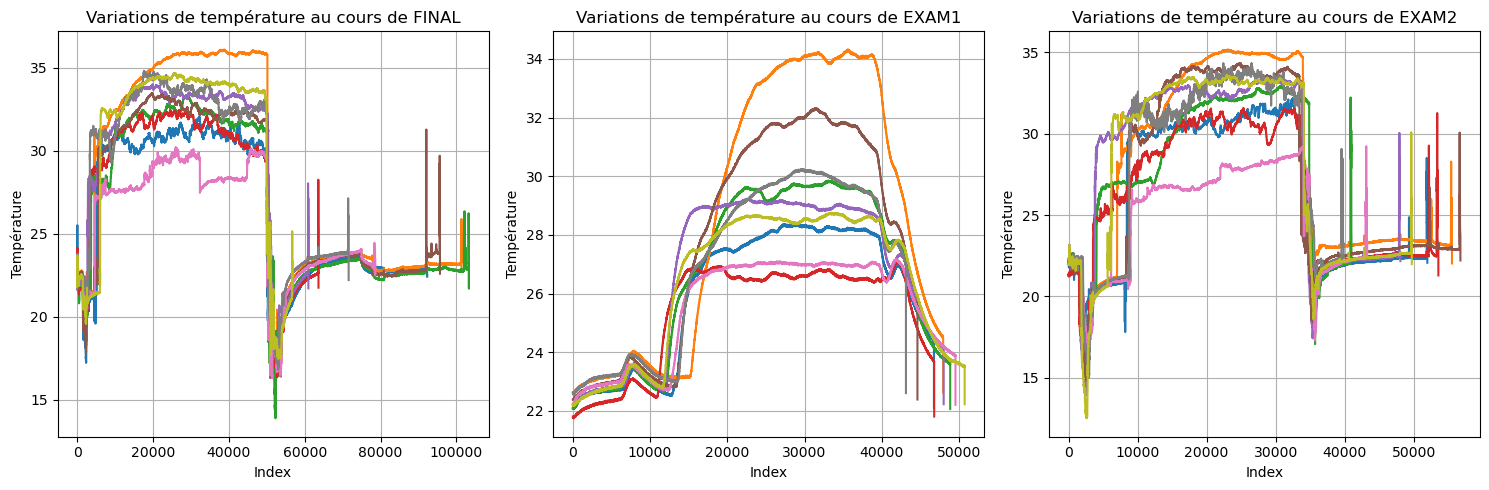

In [12]:

Exam = ['FINAL', 'EXAM1', 'EXAM2']
plt.figure(figsize=(15, 5))  

for i, j in enumerate(Exam):
    plt.subplot(1, 3, i + 1)  
    k = 1
    for student_df in df_student:
        
        temperature = 'TEMP_' + j
        longuer = len(student_df[temperature].dropna())
        TEMP_index = np.arange(longuer)
        
        plt.plot(TEMP_index, student_df[temperature].dropna(), label=f'Étudiant {k}')
        k += 1
    
    plt.title(f'Variations de température au cours de {j}')
    plt.xlabel('Index')
    plt.ylabel('Température')
    #plt.legend()
    plt.grid(True)

plt.tight_layout()  
plt.show()

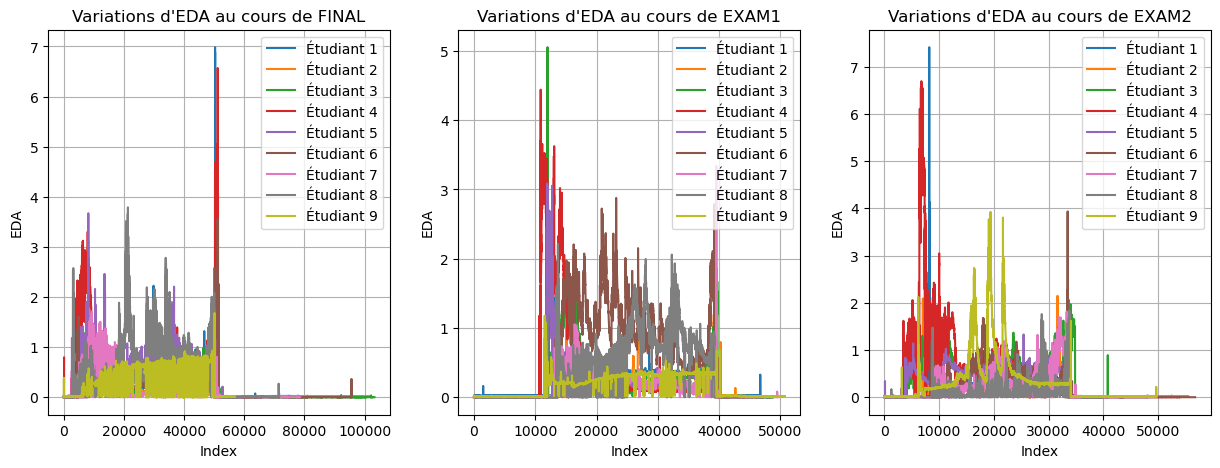

In [13]:
import matplotlib.pyplot as plt
import numpy as np



Exam = ['FINAL', 'EXAM1', 'EXAM2']
plt.figure(figsize=(15, 5))  

for i, j in enumerate(Exam):
    plt.subplot(1, 3, i + 1)  
    k=1
    for student_df in df_student:
        Eda = 'EDA_' + j
        longuer = len(student_df[Eda].dropna())
        TEMP_index = np.arange(longuer)
        plt.plot(TEMP_index, student_df[Eda].dropna() , label=f'Étudiant {k}')
        k+=1
    
    plt.title(f'Variations d\'EDA au cours de {j}')
    plt.xlabel('Index')
    plt.ylabel('EDA')
    plt.legend()
    plt.grid(True)
  
plt.show()

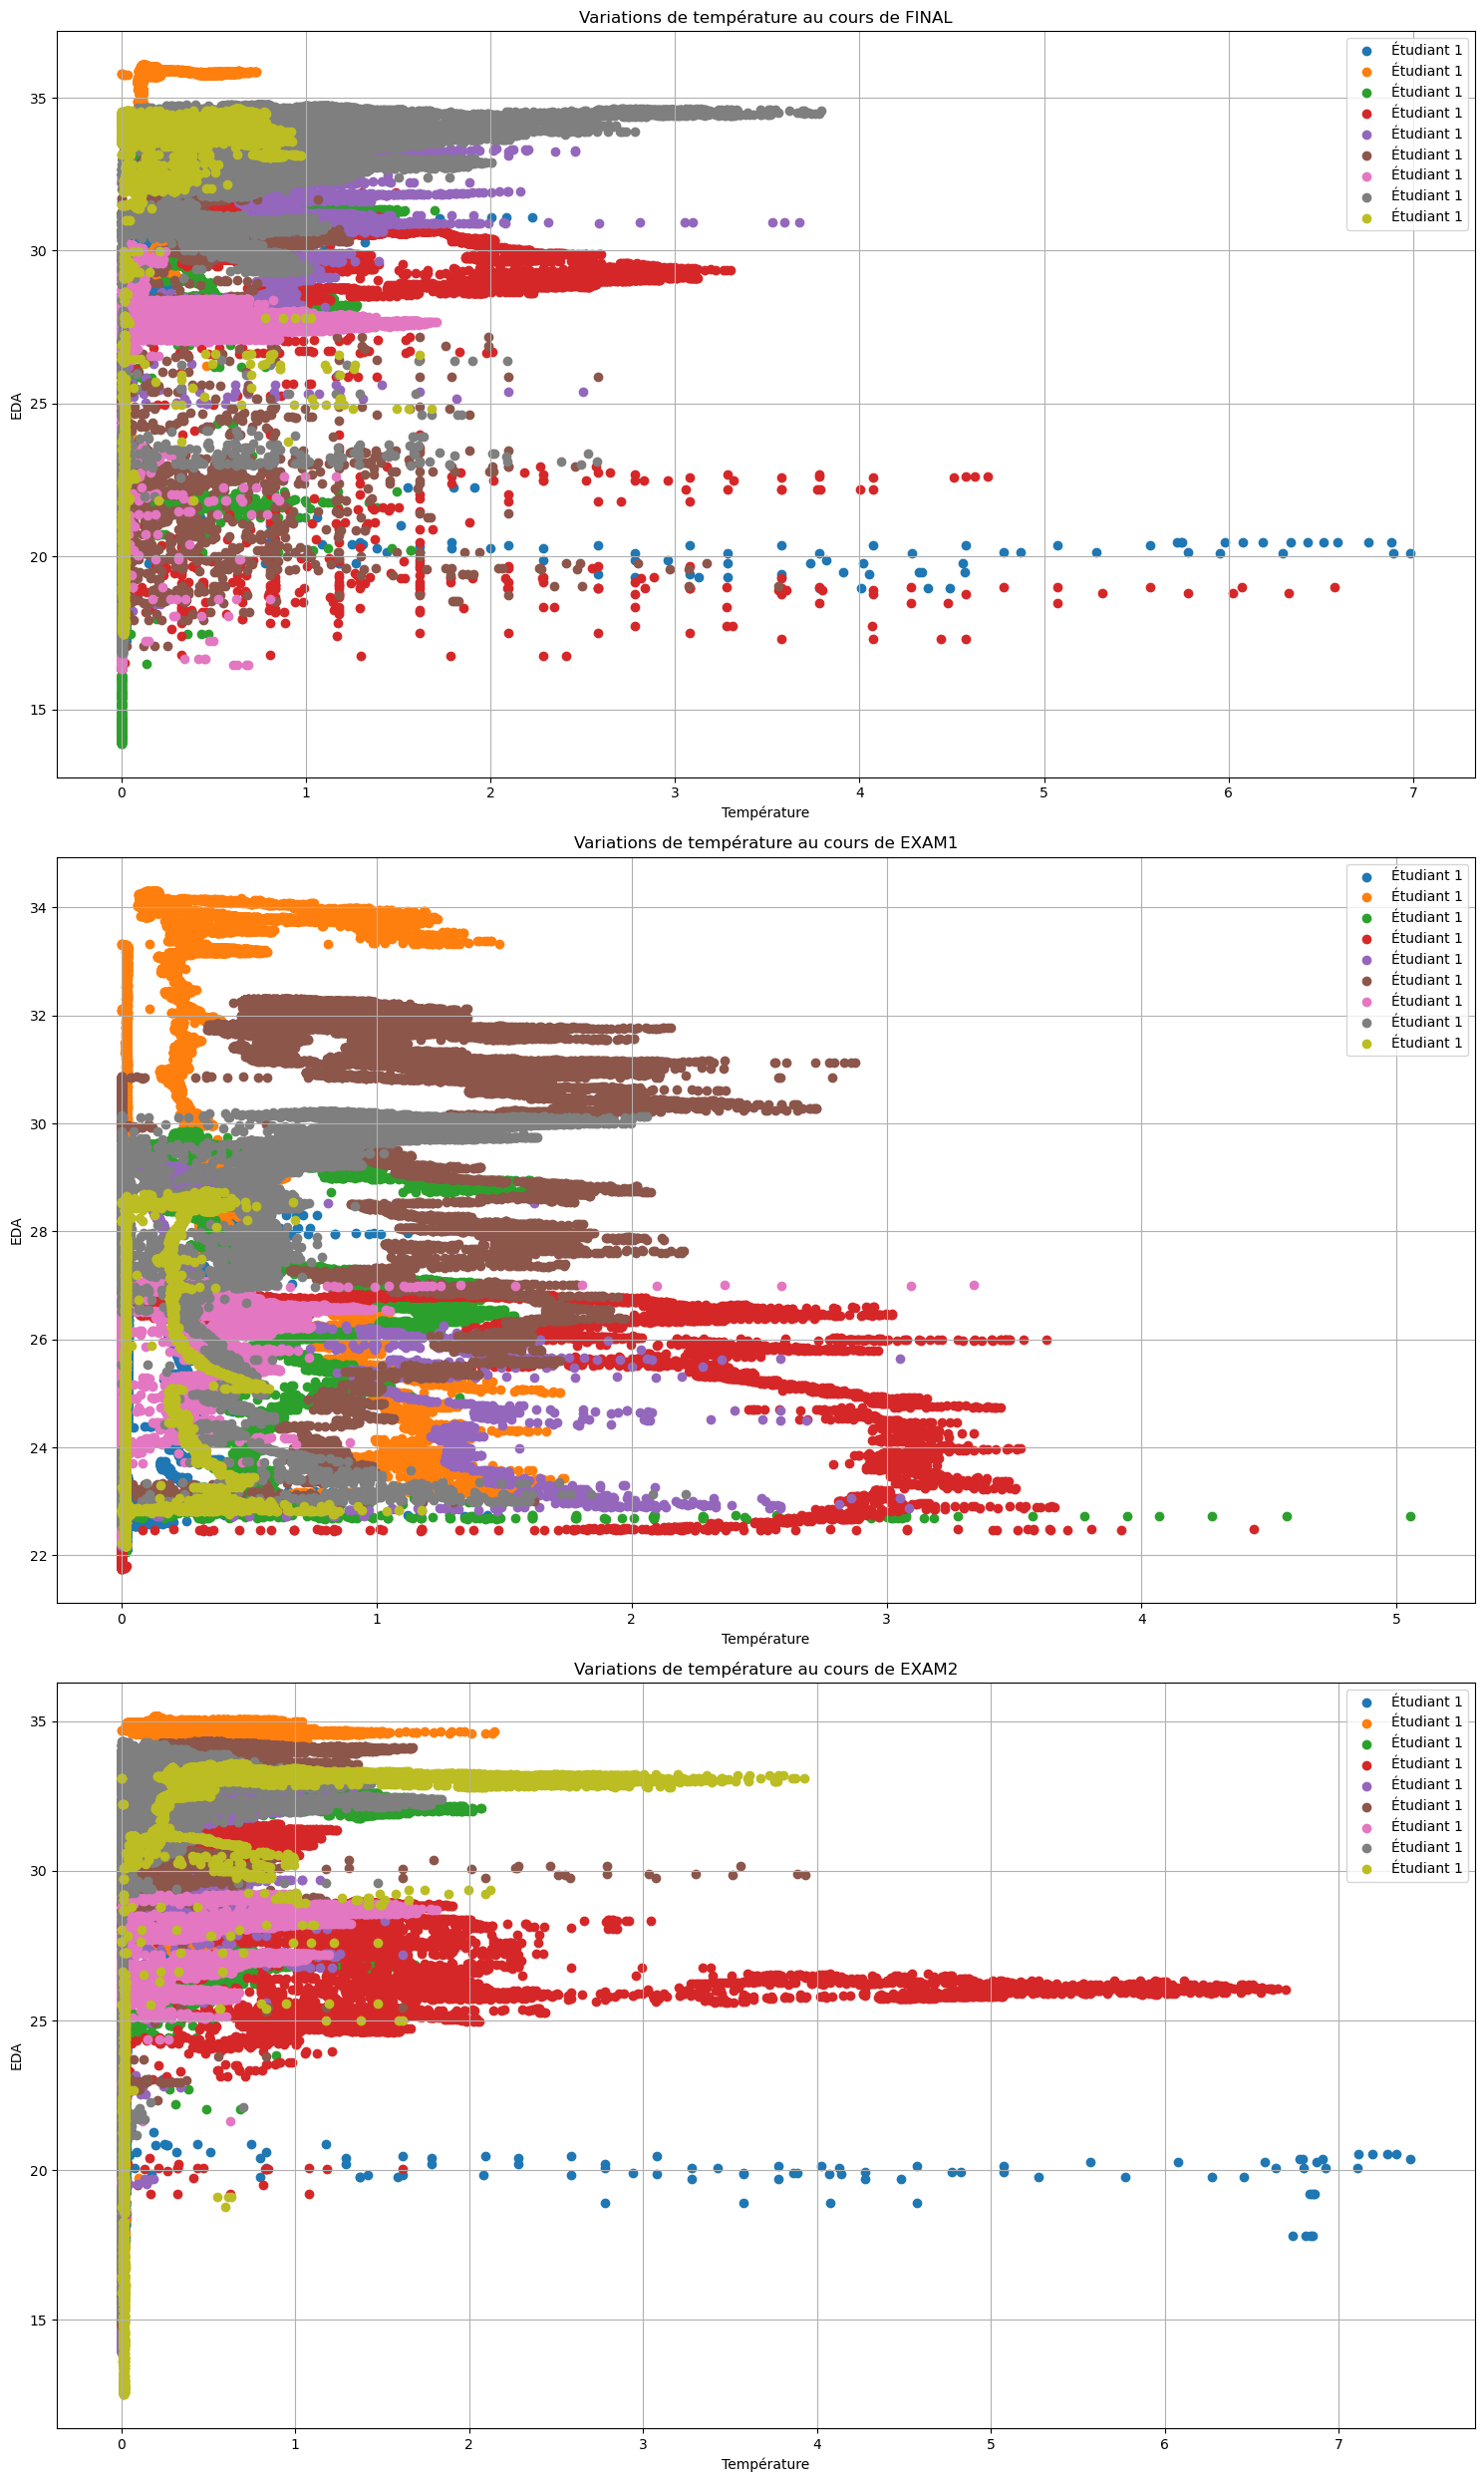

In [15]:
import matplotlib.pyplot as plt
import numpy as np


Exam = ['FINAL', 'EXAM1', 'EXAM2']
plt.figure(figsize=(15, 25))  

for i, j in enumerate(Exam):
    plt.subplot(3, 1, i + 1)  
    k=1
    for student_df in df_student:
        temperature = 'TEMP_' + j
        TEMP = student_df[temperature].dropna()
        
        Eda = 'EDA_' + j
        EDA = student_df[Eda].dropna()
        
        
        min_shape = min(TEMP.shape[0], EDA.shape[0])
        
        
        if min_shape > 0:
            plt.scatter(EDA.iloc[:min_shape], TEMP.iloc[:min_shape] , label=f'Étudiant {k}')
        
    plt.title(f'Variations de température au cours de {j}')
    plt.xlabel('Température')
    plt.ylabel('EDA')
    plt.legend()
    plt.grid(True)
    
plt.tight_layout()  
plt.show()

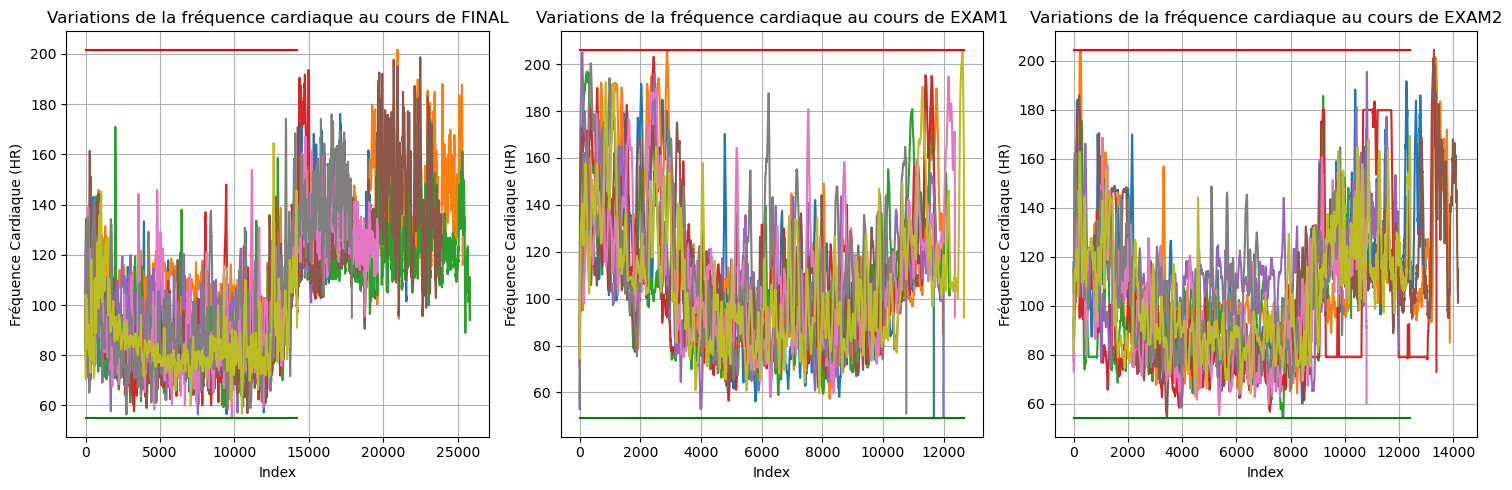

In [16]:
import matplotlib.pyplot as plt
import numpy as np

Exam = ['FINAL', 'EXAM1', 'EXAM2']
plt.figure(figsize=(15, 5))

for i, j in enumerate(Exam):
    hr_values = []  
    k = 1
    plt.subplot(1, 3, i + 1) 
    
    for df in df_student:
        HR_col = "HR_" + j
        Hr = df[HR_col].dropna()
        hr_values.extend(Hr)  
        index = np.arange(len(Hr))
        plt.plot(index, Hr, label=f'Étudiant {k}')
        k += 1
    
    
    if hr_values:
        min_hr = min(hr_values)
        max_hr = max(hr_values)

        # Tracer une ligne horizontale au niveau du min et max
        plt.plot([0, len(Hr)], [min_hr, min_hr], color='green', linestyle='-')
        plt.plot([0, len(Hr)], [max_hr, max_hr], color='red', linestyle='-')

    plt.title(f'Variations de la fréquence cardiaque au cours de {j}')
    plt.xlabel('Index')
    plt.ylabel('Fréquence Cardiaque (HR)')
    #plt.legend()
    plt.grid(True)

plt.tight_layout()  #
plt.show()

In [17]:
df_student[0].head()

,EDA_FINAL,TEMP_FINAL,HR_FINAL,IBI_FINAL,EDA_EXAM1,TEMP_EXAM1,HR_EXAM1,IBI_EXAM1,EDA_EXAM2,TEMP_EXAM2,HR_EXAM2,IBI_EXAM2
0,0.001281,22.41,109.0,0.484397,0.001281,22.11,53.00,0.390643,0.001281,22.07,112.50,0.453146
1,0.020500,22.41,90.0,0.484397,0.019220,22.11,56.67,0.312514,0.019219,22.07,118.00,0.531274
2,0.020500,22.41,99.0,0.390643,0.019220,22.11,57.75,0.468771,0.020500,22.07,105.00,0.453146
3,0.019219,22.41,90.0,0.515649,0.017939,22.11,58.80,0.515649,0.019219,22.07,113.60,0.484397
4,0.017938,22.41,83.5,0.468771,0.017939,22.11,58.17,0.375017,0.017938,22.07,115.33,0.484397


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


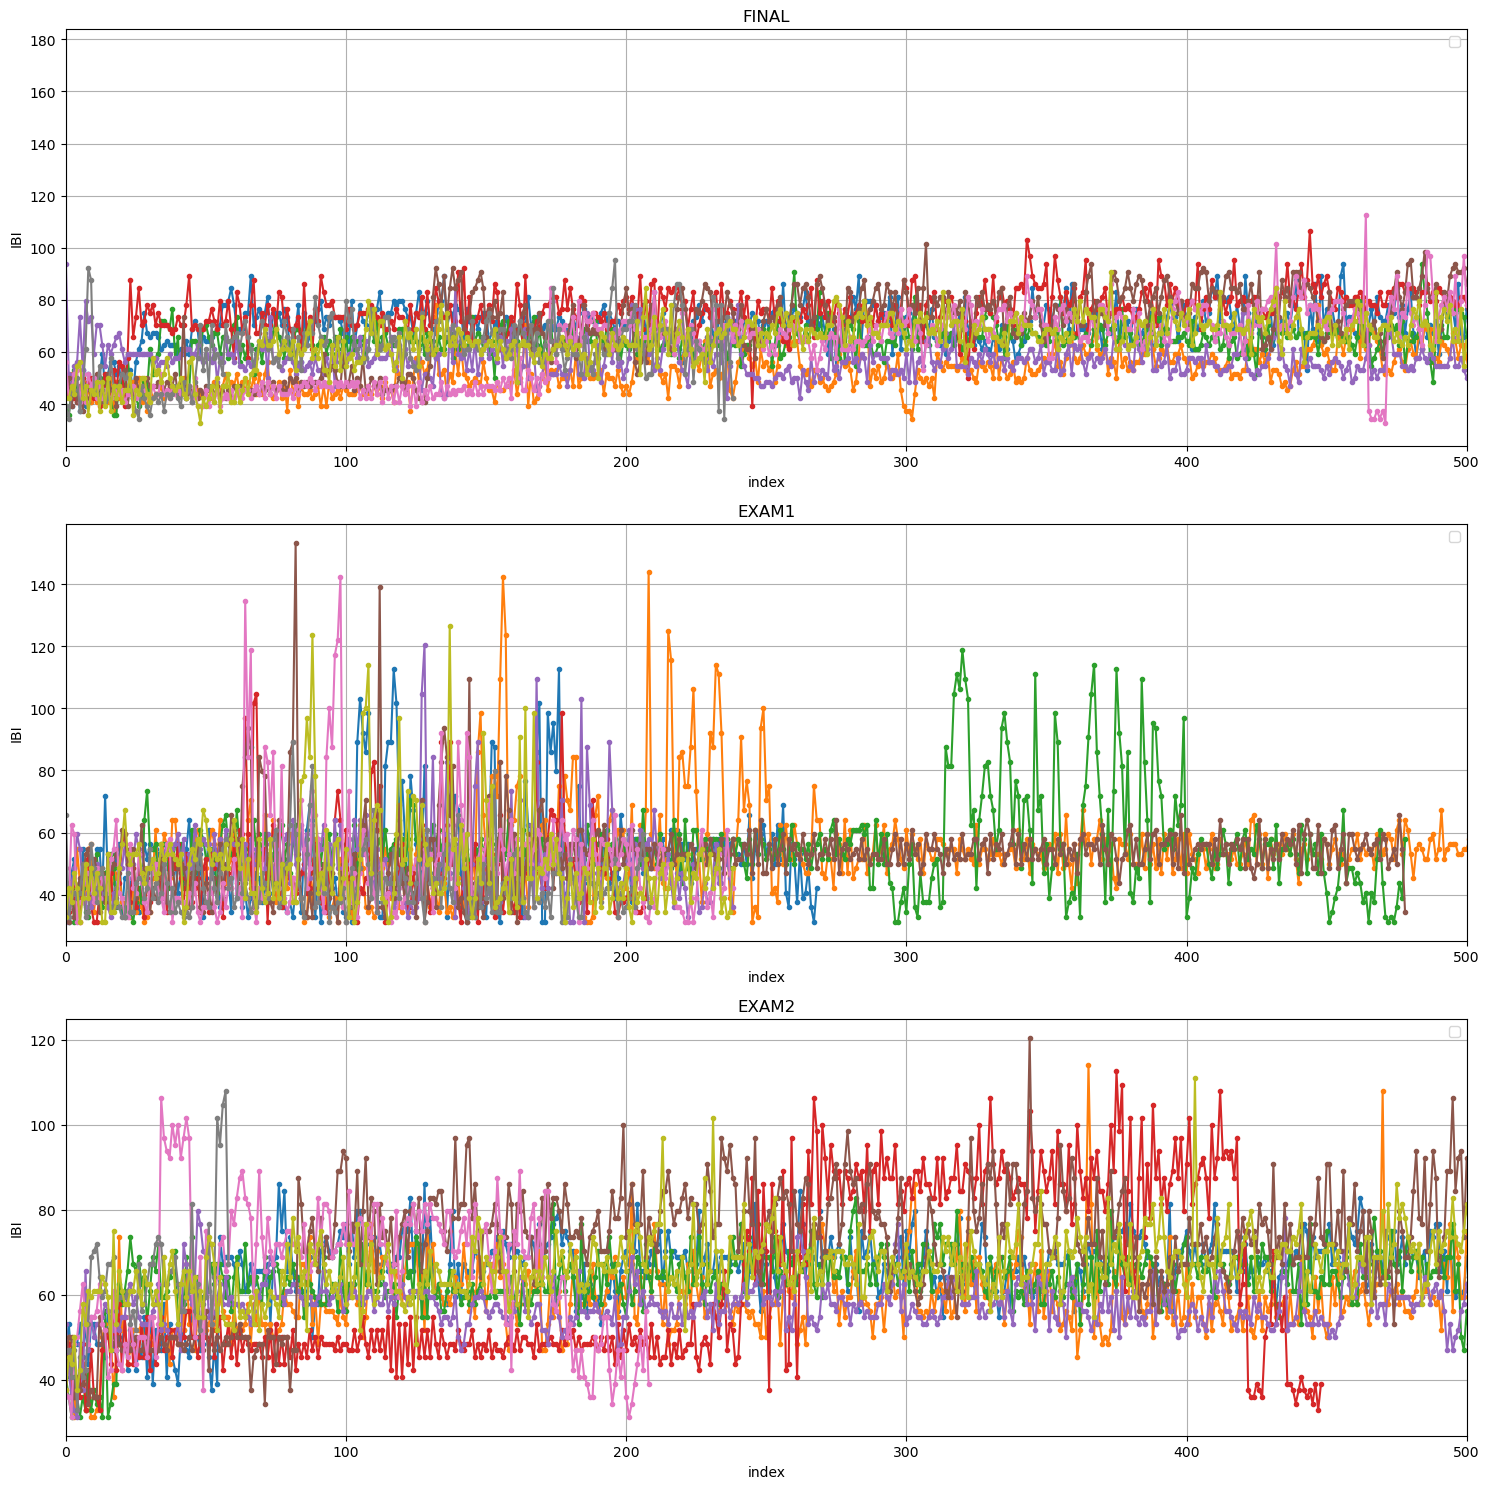

In [18]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for i, j in enumerate(Exam):
    plt.subplot(3, 1 , i + 1)
    for student_df in df_student:
        col_IBI = 'IBI_' + j
        #col_HR = 'HR_' + j
        
        IBI = (student_df[col_IBI].dropna()*100)
        index = np.arange(len(IBI))
        #HR = student_df[col_HR].dropna()
        
        #pas = int(HR.shape[0] / IBI.shape[0])
        
        #HR_Normal = []
        
        """
        for k in range(0, len(HR), pas):
            moyenne = HR[k:k + pas]
            if len(moyenne) > 0:
                HR_Normal.append(statistics.mean(moyenne))
        """
        
        #Hr_plot = HR_Normal[0:IBI.shape[0]]
        #plt.scatter(Hr_plot, IBI, marker='o')
        plt.plot(index , IBI , marker = '.')
        

    plt.title(j)
    plt.xlim(0,500)
    plt.xlabel('index')
    plt.ylabel('IBI')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [19]:
import numpy as np


def normal(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


Exam = ['FINAL', 'EXAM1', 'EXAM2']
Dictionnaire = {}


for i in Exam:
    for j, df in enumerate(df_student):
        
        M_EDA = np.mean(normal(df['EDA_' + i].dropna()))
        M_TEMP = np.mean(normal(df['TEMP_' + i].dropna()))
        M_HR = np.mean(normal(df['HR_' + i].dropna()))
        M_IBI = np.mean(normal(df['IBI_' + i].dropna()))
        
        
        Mean_list = [M_EDA, M_TEMP, M_HR, M_IBI]
        
        
        
        Dictionnaire[f'S{j + 1}_{i}'] = Mean_list


print("Dictionnaire des moyennes normalisées :")
print(Dictionnaire)


T_EDA = 0.4
T_TEMP = 0.1
T_HR = 0.3
T_IBI = 0.2
poids = [T_EDA, T_TEMP, T_HR, T_IBI]


for j in Exam:
    for i in range(1, 10): 
        nom = f'S{i}_{j}'
        if nom in Dictionnaire:  
            l = Dictionnaire[nom]
            
            Taux = sum(l[k] * poids[k] for k in range(len(l)))
            Dictionnaire[nom] = Taux  


print("\nDictionnaire avec les taux de stress :")
print(Dictionnaire)

Dictionnaire des moyennes normalisées :
{'S1_FINAL': [0.015904570680806383, 0.6149642306574952, 0.3732651863388904, 0.5160906741613049], 'S2_FINAL': [0.10678990187638117, 0.5637211540611003, 0.3799337650563316, 0.3237505228049417], 'S3_FINAL': [0.0998280059529325, 0.651813956290715, 0.357053378544147, 0.47638974734709677], 'S4_FINAL': [0.08009121600954784, 0.7476263342989312, 0.25774784674426904, 0.5282507912109716], 'S5_FINAL': [0.14763250193671126, 0.7747028003341716, 0.4684806757348608, 0.1883306146663143], 'S6_FINAL': [0.03644538050773197, 0.6264764228567379, 0.33117267427676755, 0.5607772237625114], 'S7_FINAL': [0.12431256469372015, 0.6945991903545568, 0.4130854163643061, 0.36183452783062614], 'S8_FINAL': [0.1409686304882586, 0.6929145431212062, 0.38308385849585486, 0.4319273316926257], 'S9_FINAL': [0.2387922496690682, 0.7760719758110725, 0.2778612782783684, 0.37239915422345893], 'S1_EXAM1': [0.12482605365127608, 0.6282728739613058, 0.40394291588191517, 0.2466403577398657], 'S2_EX

In [24]:

dict_Taux = {}

for j in Exam:
    for i in range(1, 10): 
        nom = f'S{i}_{j}' 
        nom2 = f'S{i}'     
         
        if nom2 not in dict_Taux:
            dict_Taux[nom2] = []
        
        
        if nom in Dictionnaire:  
            dict_Taux[nom2].append(Dictionnaire[nom]) 


print(dict_Taux)

{'S1': [0.2830559420720002, 0.2832686551691887, 0.2719039162665552], 'S2': [0.27781831023455034, 0.2383828105907993, 0.25008526009073734], 'S3': [0.30750656104290797, 0.23568828973712735, 0.377348331568435], 'S4': [0.2897736320991873, 0.2562586797344273, 0.2519531676535643], 'S5': [0.3147336064618228, 0.24152122678874025, 0.3801259756470567], 'S6': [0.2887330415242991, 0.29611067984319384, 0.2749716921563931], 'S7': [0.3154774753883608, 0.23849269115862168, 0.3325439976589123], 'S8': [0.3269895303947057, 0.3025965158284038, 0.2849812241670363], 'S9': [0.3309623117769368, 0.25960277535247256, 0.3057667288206642]}


In [25]:
Grades.head()
#Exam2 =['MIDTERM1' , 'MIDTERM2' , 'FINAL']
Exam3 =['FINAL' , 'MIDTERM1' , 'MIDTERM2' ]
Grades = Grades[Exam3]
print(Grades.head(1))

    FINAL  MIDTERM1  MIDTERM2
S1    182        78        82


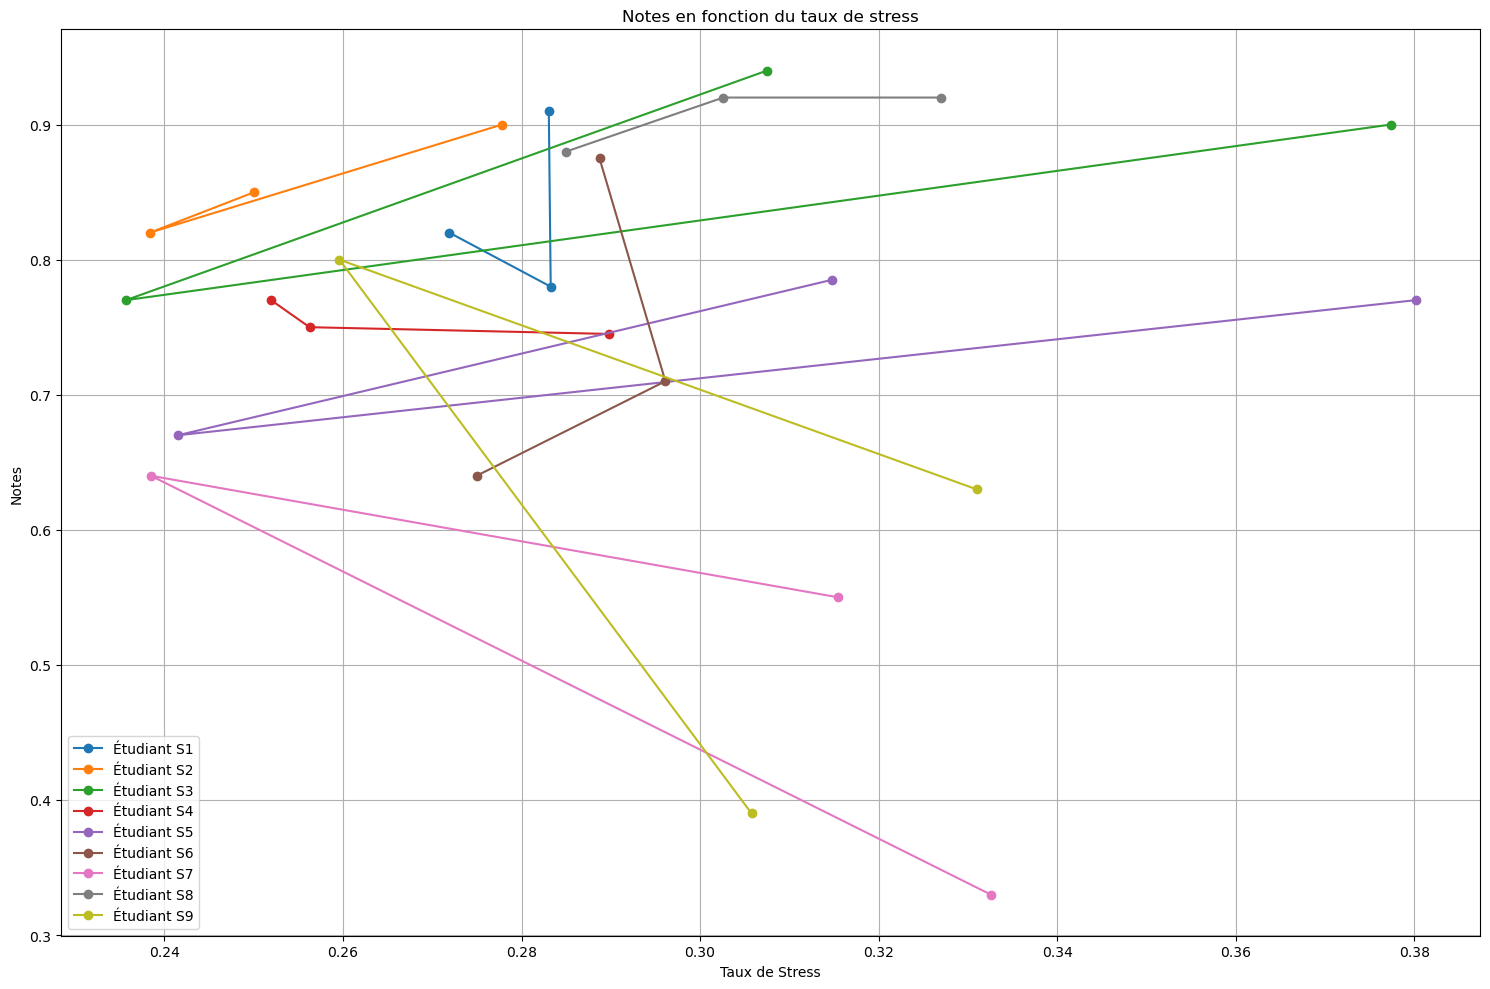

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))


for k in range(1, 10):
    
    taux_stress = dict_Taux[f'S{k}']
    
    
    notes = [Grades.iloc[k-1][j] for j in Exam3] 
    notes[0] = notes[0] / 200 
    notes[1] = notes[1] / 100
    notes[2] = notes[2] / 100
    
    

    
    plt.plot(taux_stress, notes, marker='o', label=f'Étudiant S{k}')


plt.title("Notes en fonction du taux de stress")
plt.xlabel("Taux de Stress")
plt.ylabel("Notes")
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

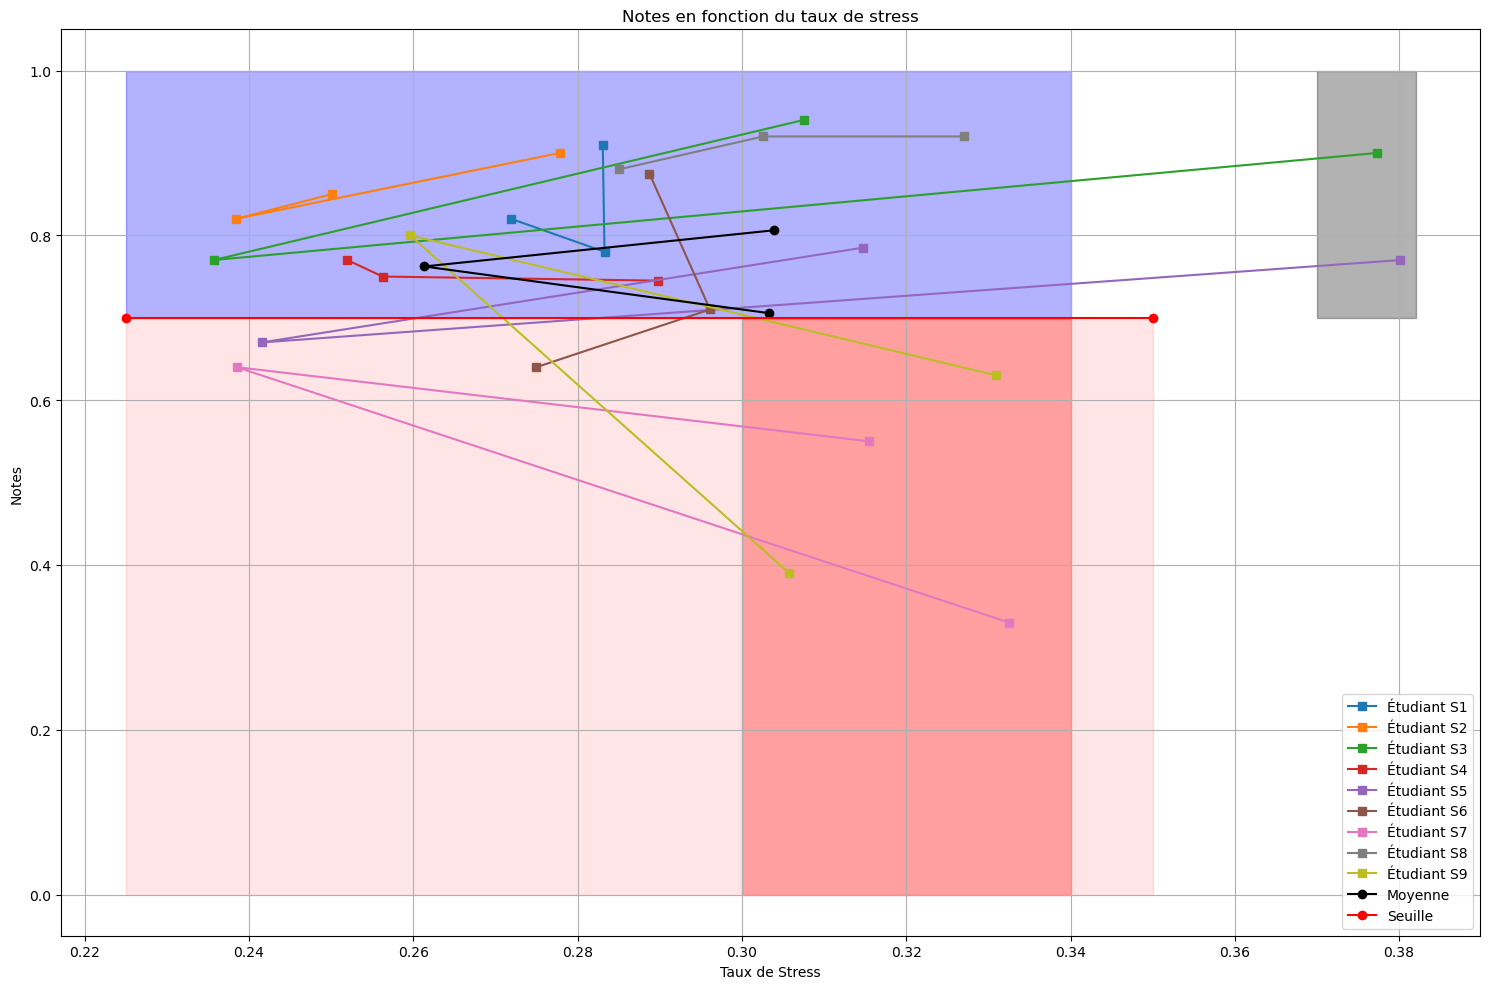

In [60]:
import matplotlib.pyplot as plt
import statistics

plt.figure(figsize=(15, 10))


Stress_moyen = [0, 0, 0]
Note_moyen = [0, 0, 0]

for k in range(1, 10):
    
    taux_stress = dict_Taux[f'S{k}']
    
    
    for i in range(3):
        Stress_moyen[i] += taux_stress[i] / 9
        
    
    notes = [Grades.iloc[k-1][j] for j in Exam3] 
    notes[0] = notes[0] / 200 
    notes[1] = notes[1] / 100
    notes[2] = notes[2] / 100
    
    for i in range(3):
        Note_moyen[i] += notes[i] / 9

    plt.plot(taux_stress, notes, marker = 's' , label=f'Étudiant S{k}')


plt.plot(Stress_moyen, Note_moyen, color='k', marker='o', label='Moyenne')


plt.plot([0.225, 0.35], [0.7, 0.7], color='r', marker='o', label='Seuille')


plt.fill_betweenx(y=[0, 0.7], x1=0.225, x2=0.35, color='red', alpha=0.1)

plt.fill_betweenx(y=[0, 0.699], x1=0.3, x2=0.34, color='r', alpha=0.3)
plt.fill_betweenx(y=[0.7, 1], x1=0.225, x2=0.34, color='b', alpha=0.3)
plt.fill_betweenx(y=[0.7, 1], x1=0.37, x2=0.382, color='k', alpha=0.3)


plt.title("Notes en fonction du taux de stress")
plt.xlabel("Taux de Stress")
plt.ylabel("Notes")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()


plt.show()

[0.8061111111111112, 0.7622222222222222, 0.7055555555555555]
[1.2155779604421202, 1.0452988107568775, 1.213191241790824]


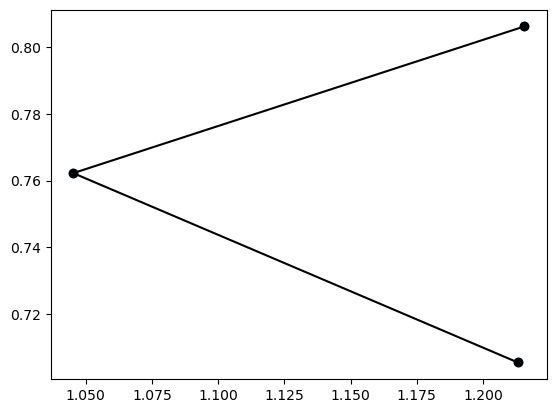

In [52]:
print(Note_moyen)
print(Stress_moyen)
plt.figure()
plt.scatter(Stress_moyen , Note_moyen)
plt.plot(Stress_moyen, Note_moyen, color='k', marker='o', label='Moyenne')

In [ ]:
df_student[0].head()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


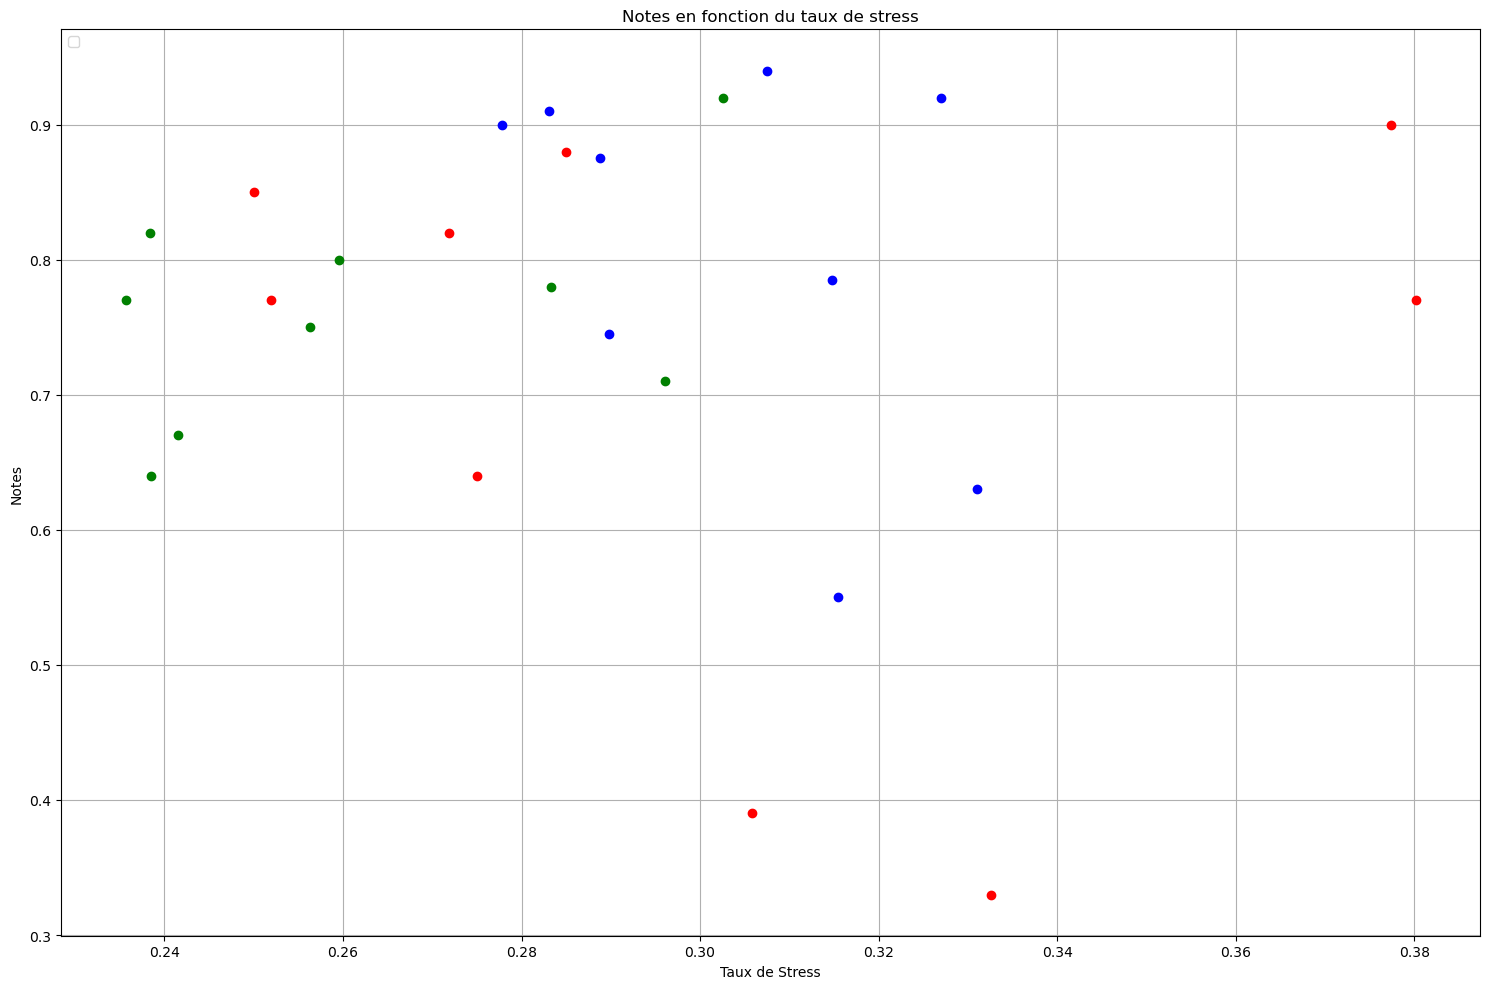

In [59]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))


couleurs = ['b', 'g', 'r']  


for k in range(1, 10):  
    
    taux_stress = dict_Taux[f'S{k}']
    
    
    notes = [Grades.iloc[k-1][j] for j in Exam3] 
    notes[0] = notes[0] / 200 
    notes[1] = notes[1] / 100   
    notes[2] = notes[2] / 100   

    
    for idx, j in enumerate(Exam3):
        plt.plot(taux_stress[idx], notes[idx], marker='o', color=couleurs[idx] )
    

plt.title("Notes en fonction du taux de stress")
plt.xlabel("Taux de Stress")
plt.ylabel("Notes")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()